# E-Commerce Text Classification
## Introduction

In this notebook, we are working on a text classification problem using a dataset of e-commerce product reviews. The goal is to classify the reviews into their respective categories.

#### Declare dependencies

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import pad_sequences
from keras.utils import to_categorical
import re



#### Load DataFrame

In [36]:
ecomm_df = pd.read_csv('ecommerceDataset.csv', names=['label', 'text'])
ecomm_df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


#### Check labels (Our categories to classify)

In [37]:
distinct_labels = ecomm_df['label'].unique()
print(distinct_labels)

['Household' 'Books' 'Clothing & Accessories' 'Electronics']


#### Tokenize the text

In [38]:
# Convert text data to strings to avoid AttributeError
ecomm_df['text'] = ecomm_df['text'].astype(str)

# Initialize the tokenizer with a custom filter to remove special characters
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(ecomm_df['text'])

# Convert the text to sequences
sequences = tokenizer.texts_to_sequences(ecomm_df['text'])

# Print the first 5 sequences to verify
print(sequences[:5])

[[356, 3330, 53, 5972, 149, 729, 5581, 242, 438, 399, 1590, 98, 106, 34, 98, 106, 103, 35, 3, 50, 1586, 51, 40, 7, 3026, 520, 8, 978, 3001, 381, 42, 259, 232, 1945, 2, 9774, 2246, 12, 13, 9, 23, 369, 414, 3, 5417, 42, 108, 10, 149, 105, 237, 2, 259, 5, 1079, 329, 13, 1586, 9, 546, 4, 1392, 11, 378, 22, 4108, 4, 9640, 13, 248, 1586, 15, 9, 5, 14729, 1517, 64, 36, 113, 1, 74, 323, 2, 783, 1682, 185, 14, 54, 1590, 8, 113, 1, 2, 11678, 2, 1305, 6247, 10518, 2, 739, 3381, 13, 836, 327, 1682, 3528, 1117, 7, 204, 2, 5418, 517, 1590, 3, 1, 1144, 15, 524, 5, 1878, 64, 381, 15548, 8, 117, 5069, 107, 11678, 4, 1677, 1661, 2, 853, 904, 515, 4, 112, 45, 341, 3, 978, 1656, 54, 1590, 4296, 112, 237, 904, 6, 205, 126, 412, 118, 2, 94, 4, 10, 361, 214, 8, 13, 6648, 562, 1586, 382, 20, 6, 2868, 2, 382, 6, 8025, 9024, 78, 667, 52, 13, 349, 381, 15, 9, 41789, 8, 485, 351, 15, 108, 12, 1855, 100, 2666, 1662, 4, 22, 4, 10, 655, 2, 294, 12, 378, 22, 10519, 3444, 28, 17911, 10, 8687, 4181, 9, 10214, 40, 10, 2

#### Encode the labels

In [39]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
ecomm_df['label_encoded'] = label_encoder.fit_transform(ecomm_df['label'])

# Create a var called label_encoded that contains the encoded labels
label_encoded=ecomm_df['label_encoded'].to_numpy()

# Print the first 5 rows to verify
print(ecomm_df.head())


       label                                               text  label_encoded
0  Household  Paper Plane Design Framed Wall Hanging Motivat...              3
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...              3
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...              3
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...              3
4  Household  Incredible Gifts India Wooden Happy Birthday U...              3


#### Train test split the sequences and labels

In [40]:
# Split the sequences and label_encoded into training and testing sets
# Split the sequences and label_encoded into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(sequences, label_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting arrays to verify
print(f'X_train shape: {len(X_train)}')
print(f'X_val shape: {len(X_val)}')
print(f'X_test shape: {len(X_test)}')
print(f'y_train shape: {len(y_train)}')
print(f'y_val shape: {len(y_val)}')
print(f'y_test shape: {len(y_test)}')

X_train shape: 35297
X_val shape: 7564
X_test shape: 7564
y_train shape: 35297
y_val shape: 7564
y_test shape: 7564


#### Define Max words and Max Length

In [41]:
# Define the maximum number of words and the maximum sequence length
max_words = 50000
max_len = 100

#### Adapt Sequences and labels

In [42]:
# Pad the sequences to ensure uniform input size (this put a 0 in front of the sequence to make them all the same length)
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)
X_val_padded = pad_sequences(X_val, maxlen=max_len)

# Convert labels to categorical format (this change the label to a one-hot encoded format e.g [0,0,1,0])
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_val_categorical = to_categorical(y_val)

### Model
#### Defining and Fitting

In [43]:
# Define the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=64, validation_data=(X_val_padded, y_val_categorical))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          5000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 5,080,804
Trainable params: 5,080,804
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
552/552 [==============================] - 10s 16ms/step - loss: 0.3905 - accuracy: 0.8656 - val_los

#### Testing Accuracy on test data

In [44]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical, verbose=0)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.16139884293079376
Test Accuracy: 0.9680063724517822


#### Plot a graph to show loss and accuracy over each epoch of the model

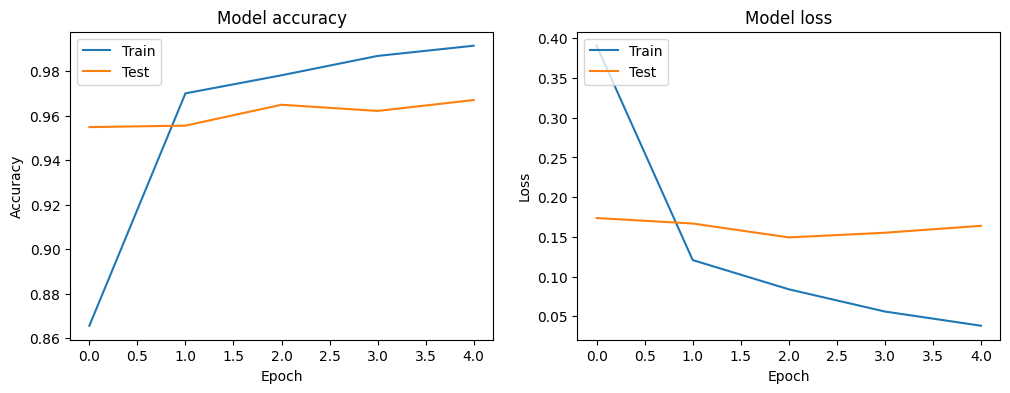

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#### Predict one test data only

In [46]:
# Select a single test sample
sample_index = 5
sample = X_test_padded[sample_index].reshape(1, -1)

# Predict the label for the sample
predicted_probabilities = model.predict(sample)
predicted_label = predicted_probabilities.argmax(axis=-1)
real_label = y_test[sample_index]

# Decode the predicted label to its original category
predicted_category = label_encoder.inverse_transform(predicted_label)
predicted_real = label_encoder.inverse_transform([real_label])

print(f'Predicted label: {predicted_label[0]}')
print(f'Predicted category: {predicted_category[0]}')
print(f'Real label: {real_label}')
print(f'Real category: {predicted_real[0]}')

1/1 [==============================] - 0s 257ms/step
Predicted label: 2
Predicted category: Electronics
Real label: 2
Real category: Electronics


#### Predict all test data

In [47]:
# Predict the labels for all samples in X_test_padded
predicted_probabilities_all = model.predict(X_test_padded)
predicted_labels_all = predicted_probabilities_all.argmax(axis=-1)

# Decode the predicted labels to their original categories
predicted_categories_all = label_encoder.inverse_transform(predicted_labels_all)

# Print the first 10 predictions to verify
for i in range(10):
    print(f'Sample {i}: Predicted Category: {predicted_categories_all[i]}, Real Category: {label_encoder.inverse_transform([y_test[i]])[0]}')

237/237 [==============================] - 1s 5ms/step
Sample 0: Predicted Category: Books, Real Category: Books
Sample 1: Predicted Category: Household, Real Category: Household
Sample 2: Predicted Category: Household, Real Category: Household
Sample 3: Predicted Category: Electronics, Real Category: Electronics
Sample 4: Predicted Category: Clothing & Accessories, Real Category: Clothing & Accessories
Sample 5: Predicted Category: Electronics, Real Category: Electronics
Sample 6: Predicted Category: Clothing & Accessories, Real Category: Clothing & Accessories
Sample 7: Predicted Category: Household, Real Category: Household
Sample 8: Predicted Category: Household, Real Category: Household
Sample 9: Predicted Category: Household, Real Category: Household


#### Plot test labels versus predictions

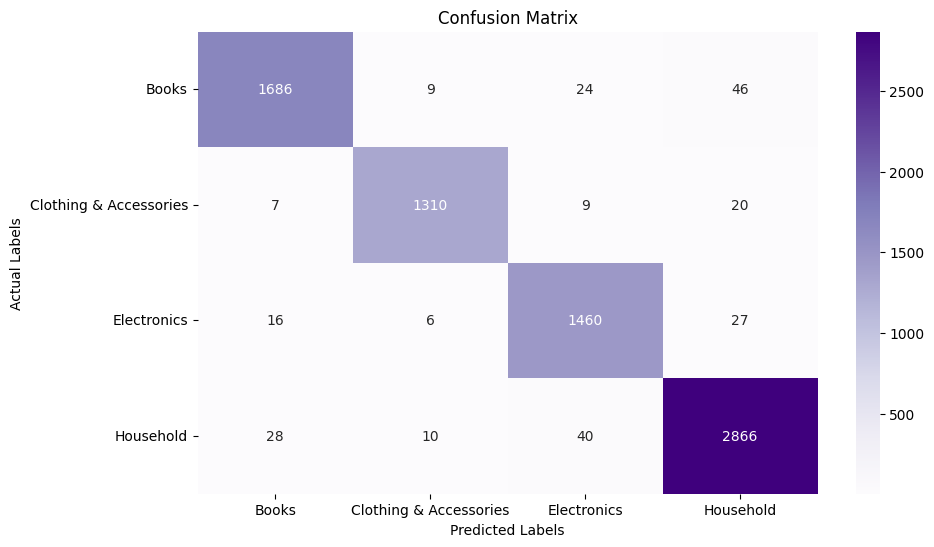

In [49]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_all)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


## Conclusion

In this notebook, we successfully built and evaluated a text classification model using a dataset of e-commerce product reviews. The workflow included the following steps:

1. **Data Loading and Preprocessing**: We loaded the dataset, converted text data to sequences using a tokenizer, and encoded the labels.
2. **Data Splitting**: We split the data into training and testing sets.
3. **Model Building**: We constructed a Sequential model using Keras with an embedding layer, LSTM layer, and dense output layer.
4. **Model Training**: We trained the model on the training data and validated it on the test data.
5. **Evaluation**: We evaluated the model's performance using accuracy and loss metrics.
6. **Visualization**: We visualized the training and validation accuracy and loss over epochs.
7. **Prediction and Analysis**: We made predictions on the test data, decoded the predicted labels, and analyzed the results using a confusion matrix.

The model achieved a high accuracy of 96.8% on the test data, indicating its effectiveness in classifying e-commerce product reviews into their respective categories. The confusion matrix further helped us understand the model's performance across different classes.
